In [79]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Read train and test datasets

In [80]:
train = pd.read_csv('train.csv', low_memory=False)
test = pd.read_csv('test.csv', low_memory=False)

In [81]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### An overlook of the two datasets

In [83]:
print(f'shape of train dataset: {train.shape}')
print(f'shape of test dataset: {test.shape}')

shape of train dataset: (1460, 81)
shape of test dataset: (1459, 80)


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

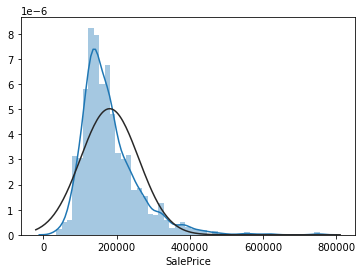

In [86]:
# check the distriution of the target in train dataset: SalePrice
sns.distplot(train['SalePrice'] , fit=norm)

The "SalePrice" approximately follows normal distribution with some outliers

#### Remove the outliers

In [87]:
# Calculate mean and standard deviation
mean = train['SalePrice'].mean()
std = train['SalePrice'].std()
print(f'mean: {mean}, std: {std}')

# remove the outliers, which are defined as 3 times of std away from mean.
cut_off = std*3
lower,upper = mean - cut_off, mean + cut_off
train = train[(train['SalePrice'] < upper) & (train['SalePrice'] > lower)]

# reset index
train.reset_index(inplace=True)
train.shape

mean: 180921.19589041095, std: 79442.50288288663


(1438, 82)

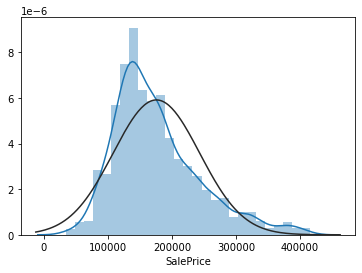

In [88]:
# check the distribution of SalePrice again
sns.distplot(train['SalePrice'] , fit=norm)

The correlation between "SalePrice" and other features

In [89]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.796343
GrLivArea        0.670485
GarageCars       0.651158
GarageArea       0.626092
TotalBsmtSF      0.582442
1stFlrSF         0.572255
YearBuilt        0.557339
FullBath         0.553524
YearRemodAdd     0.536864
GarageYrBlt      0.506608
TotRmsAbvGrd     0.487621
Fireplaces       0.465635
MasVnrArea       0.420717
LotFrontage      0.342167
BsmtFinSF1       0.341000
WoodDeckSF       0.330921
OpenPorchSF      0.313403
2ndFlrSF         0.287319
HalfBath         0.276652
LotArea          0.253476
BsmtFullBath     0.231469
BsmtUnfSF        0.216787
BedroomAbvGr     0.172871
ScreenPorch      0.092677
MoSold           0.081094
3SsnPorch        0.061720
PoolArea         0.036829
BsmtFinSF2      -0.004591
MiscVal         -0.018489
YrSold          -0.019633
BsmtHalfBath    -0.026684
Id              -0.028112
index           -0.028112
LowQualFinSF    -0.060149
OverallCond     -0.069833
MSSubClass      -0.082756
EnclosedPorch   -0.140363
KitchenAbvGr

Note that this only includes numerical features

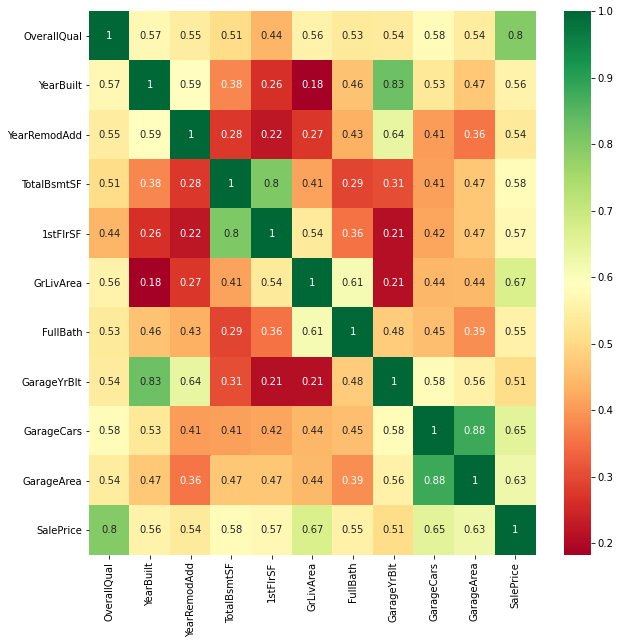

In [94]:
# The correlations of the features which are highly correlated with "SalePrice" (corr > 0.5)
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Note that some features strongly correlated with each other: "GarageArea" and "GarageCars", "YearBuilt" and "GarageYrBlt"

#### Select the train target

In [95]:
train_target = train['SalePrice'].values

In [96]:
len(train_target)

1438

#### Feature engineering

In [97]:
# add three features to both train and test
train['built_age'] = train.apply(lambda x: x.YrSold - x.YearBuilt, axis=1)
train['mod_age'] = train.apply(lambda x: x.YrSold - x.YearRemodAdd, axis=1)
train['Remod']=train.apply(lambda x:0 if x.YearBuilt==x.YearRemodAdd else 1, axis=1)

test['built_age'] = test.apply(lambda x: x.YrSold - x.YearBuilt, axis=1)
test['mod_age'] = test.apply(lambda x: x.YrSold - x.YearRemodAdd, axis=1)
test['Remod']=test.apply(lambda x:0 if x.YearBuilt==x.YearRemodAdd else 1, axis=1)

train.shape, test.shape

((1438, 85), (1459, 83))

In [98]:
train.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,built_age,mod_age,Remod
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,NaN,0,2,2008,WD,Normal,208500,5,5,0
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,NaN,0,5,2007,WD,Normal,181500,31,31,0
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,NaN,0,9,2008,WD,Normal,223500,7,6,1
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,NaN,0,2,2006,WD,Abnorml,140000,91,36,1
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,NaN,0,12,2008,WD,Normal,250000,8,8,0


In [99]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,built_age,mod_age,Remod
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,49,49,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,52,52,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,13,12,1
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,12,12,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,0,1,2010,WD,Normal,18,18,0


In [100]:
# make a copy of test dataset for adding "Id" the prediction
test_copy = test.copy()

# drop columns not needed
train.drop(['Id','index','SalePrice'],axis=1, inplace=True)
test.drop(['Id'],axis=1, inplace=True)

train.shape, test.shape

((1438, 82), (1459, 82))

#### Split the datasets into numerical ones and categorical ones, so that we can impute them differently

In [101]:
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns

train_num = train[numerical_features]
train_cat = train[categorical_features]

test_num = test[numerical_features]
test_cat = test[categorical_features]

print(train_num.shape, test_num.shape)
print(train_cat.shape, test_cat.shape)

(1438, 39) (1459, 39)
(1438, 43) (1459, 43)


#### Missing value imputation and scaling

In [102]:
# which columns in train_num has missing values?
train_num.columns[train_num.isna().any()].tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [103]:
train_num['LotFrontage'].describe()

count    1181.000000
mean       69.705334
std        24.095528
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [104]:
# impute missing values in numerical datasets
imputer = SimpleImputer(strategy = "mean")

imputer.fit(train_num)
data = imputer.transform(train_num)
train_num_imputed = pd.DataFrame(data, columns = train_num.columns)

#imputer.fit(test_num)
data = imputer.transform(test_num)
test_num_imputed = pd.DataFrame(data, columns = test_num.columns)

In [105]:
# scaling
scaler = StandardScaler()

scaler.fit(train_num_imputed)
data = scaler.transform(train_num_imputed)
train_num_processed = pd.DataFrame(data, columns = train_num.columns)

#scaler.fit(test_num_imputed)
data = scaler.transform(test_num_imputed)
test_num_processed = pd.DataFrame(data, columns = test_num.columns)

In [106]:
# which columns in train_cat has missing values?
train_cat.columns[train_cat.isna().any()].tolist()

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [107]:
train_cat['BsmtQual'].value_counts()

TA    648
Gd    616
Ex    102
Fa     35
Name: BsmtQual, dtype: int64

In [108]:
# fill missing values in categorical data frame with 'NA'
train_cat.fillna(value='NA',inplace=True)
test_cat.fillna(value='NA',inplace=True)

In [109]:
train_cat.shape,test_cat.shape

((1438, 43), (1459, 43))

#### Process the categorical datasets
get_dummies() are not chosen here because train and test has different number of unique values in some columns. Useing get_dummies() results in different number of columns for these two datasets.

In [110]:
enc = preprocessing.OrdinalEncoder()

enc.fit(train_cat)
data = enc.transform(train_cat)
train_cat_processed = pd.DataFrame(data, columns = train_cat.columns)

enc.fit(test_cat)
data = enc.transform(test_cat)
test_cat_processed = pd.DataFrame(data, columns = test_cat.columns)

In [111]:
train_cat_processed_toCat = train_cat_processed.astype('category')
test_cat_processed_toCat = test_cat_processed.astype('category')

#### Concat the numerical dataset and categorical dataset

In [112]:
train_pp = pd.concat([train_num_processed,train_cat_processed_toCat],axis=1)
test_pp = pd.concat([test_num_processed,test_cat_processed_toCat],axis=1)

# chech the shape of train and test
train_pp.shape, test_pp.shape

((1438, 82), (1459, 82))

In [113]:
# According the data dict, these features are categorical. Convert them to categorical.
train_pp.MSSubClass = train_pp.MSSubClass.astype('category')
train_pp.OverallQual = train_pp.OverallQual.astype('category')
train_pp.OverallCond = train_pp.OverallCond.astype('category')
train_pp.MoSold = train_pp.MoSold.astype('category')

test_pp.MSSubClass = test_pp.MSSubClass.astype('category')
test_pp.OverallQual = test_pp.OverallQual.astype('category')
test_pp.OverallCond = test_pp.OverallCond.astype('category')
test_pp.MoSold = test_pp.MoSold.astype('category')

#### Split the train dataset

In [114]:
X_train, X_test, y_train, y_test = train_test_split(train_pp.values, train_target,
                                                    test_size=0.3,random_state=1)

### Modeling

#### LinearRegression

In [115]:
# instantiate the regressor
lin_reg = LinearRegression()

# fit
lin_reg.fit(X_train,y_train)

LinearRegression()

In [116]:
# check the performance of thes model on train dataset
X_train_pred = lin_reg.predict(X_train)
X_test_pred = lin_reg.predict(X_test)
display(np.mean(np.abs(y_train - X_train_pred) / y_train))
display(np.mean(np.abs(y_test - X_test_pred) / y_test))

0.11531266093013626

0.1289193806518094

There is a little overfitting.

In [118]:
# check the performance of the model with test dataset
test_pred = lin_reg.predict(test_pp.values)

p = pd.DataFrame(test_pred,index=test_copy.Id,columns=['SalePrice'])
o = pd.read_csv('test_actual_price.csv', low_memory=False)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
display(eva.head())
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(f'mape score using LinearRegression: {mape}')

,Id,SalePrice_pred,SalePrice_actual
0,1461,74281.765846,105000
1,1462,148497.745858,172000
2,1463,139283.483814,189900
3,1464,172707.387671,195500
4,1465,171116.748673,191500


mape score using LinearRegression: 0.16504217473712393


#### Random Forest Regressor

In [119]:
# instantiate the regressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

# fit the model
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [120]:
# check the performance of thes model on train dataset
X_train_pred = regressor.predict(X_train)
X_test_pred = regressor.predict(X_test)
display(np.mean(np.abs(y_train - X_train_pred) / y_train))
display(np.mean(np.abs(y_test - X_test_pred) / y_test))

0.04655723965601999

0.1161615242070669

There are overfitting for this model

In [121]:
# check the performance of the model with test dataset
test_pred = regressor.predict(test_pp.values)

p = pd.DataFrame(test_pred,index=test_copy.Id,columns=['SalePrice'])
o = pd.read_csv('test_actual_price.csv', low_memory=False)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
display(eva.head())
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(f'mape score using RandomForestRegressor: {mape}')

,Id,SalePrice_pred,SalePrice_actual
0,1461,121490.0,105000
1,1462,151950.0,172000
2,1463,178400.0,189900
3,1464,181730.0,195500
4,1465,175790.0,191500


mape score using RandomForestRegressor: 0.1175877773312153


The mape score we got on test dataset using RandomForestRegressor is 0.118. It performs better than LinearRegression.

#### Ridge

In [122]:
# instantiate the regressor
ridge = Ridge(alpha=0.8,normalize = True)

# fit
ridge.fit(X_train,y_train)

Ridge(alpha=0.8, normalize=True)

In [123]:
# check the performance of thes model on train dataset
X_train_pred = ridge.predict(X_train)
X_test_pred = ridge.predict(X_test)
display(np.mean(np.abs(y_train - X_train_pred) / y_train))
display(np.mean(np.abs(y_test - X_test_pred) / y_test))

0.10796917582201433

0.11138681665581501

There is a little overfitting

In [124]:
# check the performance of the model with test dataset
test_pred = ridge.predict(test_pp.values)

p = pd.DataFrame(test_pred,index=test_copy.Id,columns=['SalePrice'])
o = pd.read_csv('test_actual_price.csv', low_memory=False)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
display(eva.head())
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(f'mape score using Ridge: {mape}')

,Id,SalePrice_pred,SalePrice_actual
0,1461,103245.085603,105000
1,1462,152679.081341,172000
2,1463,165146.286317,189900
3,1464,191997.016161,195500
4,1465,174350.982254,191500


mape score using Ridge: 0.1314222789954899


The mape score we got on test dataset using Ridge is 0.131. It is not as well as RandomForestRegressor.

#### Lasso regressor with GridSearchCV

In [127]:
# create a hyperparameter grid
a_space = np.linspace(0,20,51)
param_grid = {'alpha': a_space}

# instantiate the regressor
lasso = Lasso()

# Instantiate the GridSearchCV 
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)

# Fit
lasso_cv.fit(train_pp.values, train_target)

print(f"Tuned Lasso Regression Parameters: {lasso_cv.best_params_}") 

Tuned Lasso Regression Parameters: {'alpha': 20.0}


In [128]:
# check the performance of this model on train dataset
train_pred = lasso_cv.predict(X_train)
test_pred = lasso_cv.predict(X_test)
display(np.mean(np.abs(y_train - train_pred) / y_train))
display(np.mean(np.abs(y_test - test_pred) / y_test))

0.1005762683492415

0.10485953366927045

There are no overfitting.

In [129]:
# check the performance of this model with test dataset
test_pred = lasso_cv.predict(test_pp.values)

p = pd.DataFrame(test_pred,index=test_copy.Id,columns=['SalePrice'])
o = pd.read_csv('test_actual_price.csv', low_memory=False)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])

mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(f'mape score using Lasso regressor: {mape}')

mape score using Lasso regressor: 0.115776815980104


The mape score we got on test dataset using Lasso regressor is 0.116. It is almost the same as RandomForestRegressor. 

### TPOTRegressor
http://epistasislab.github.io/tpot/
TPOT explores thousands of possible pipelines to find the best one for the data and provides the best pipeline it finds.

In [130]:
train_pp2 = pd.concat([train_num_imputed,train_cat_processed],axis=1)
test_pp2 = pd.concat([test_num_imputed,test_cat_processed],axis=1)

# chech the shape of train and test
train_pp.shape, test_pp.shape

((1438, 82), (1459, 82))

In [131]:
# split the train dataset
X_train, X_test, y_train, y_test = train_test_split(train_pp2.values, train_target,
                                                    test_size=0.3,random_state=1)
# Make a custom metric function
def mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)

# Make a custom a scorer from the custom metric function
# Note: greater_is_better=False in make_scorer below would mean that the scoring function should be minimized.
scorer = make_scorer(mape, greater_is_better=False)

tpot = TPOTRegressor(generations=5, population_size=20,
                         scoring=scorer,
                         verbosity=2,
                         disable_update_check=True)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

# This code will take a long time to run, but it can be interrupted at any time.
# After completing searching, it presents the best pipe it finds.


Generation 1 - Current best internal CV score: -0.09650317915394467

Generation 2 - Current best internal CV score: -0.09316346078400652

Generation 3 - Current best internal CV score: -0.09098136637496082

Generation 4 - Current best internal CV score: -0.09098136637496082

Generation 5 - Current best internal CV score: -0.09098136637496082

Best pipeline: XGBRegressor(ExtraTreesRegressor(LinearSVR(LinearSVR(input_matrix, C=5.0, dual=True, epsilon=0.01, loss=squared_epsilon_insensitive, tol=0.1), C=20.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=0.001), bootstrap=False, max_features=0.8, min_samples_leaf=16, min_samples_split=19, n_estimators=100), learning_rate=0.1, max_depth=4, min_child_weight=9, n_estimators=100, nthread=1, objective=reg:squarederror, subsample=0.6500000000000001)
-0.0843685163378498


In [132]:
# check the performance of the model
X_train_pred = tpot.predict(X_train)
X_test_pred = tpot.predict(X_test)
display(np.mean(np.abs(y_train - X_train_pred) / y_train))
display(np.mean(np.abs(y_test - X_test_pred) / y_test))

0.049918493456455375

0.0843685163378498

There are some overfitting.

In [133]:
# check the performance of this model with test dataset
test_pred = tpot.predict(test_pp2.values)

p = pd.DataFrame(test_pred,index=test_copy.Id,columns=['SalePrice'])
o = pd.read_csv('test_actual_price.csv', low_memory=False)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(f'mape score using TPOTRegressor: {mape}')

mape score using TPOTRegressor: 0.08905708154356744


In [134]:
p.to_csv('test_predict_group16.csv')

In [135]:
eva.tail()

,Id,SalePrice_pred,SalePrice_actual
1454,2915,89584.625000,90500
1455,2916,83743.015625,71000
1456,2917,151735.968750,131000
1457,2918,127261.515625,132000
1458,2919,221531.250000,188000


### GradientBoostingRegressor
when we were testing different ways of pre-processing, tpop showed different best pipelines. One of the model it suggested is GradientBoostingRegressor with the hyperparameters below.

In [136]:
# train GradientBoostingRegressor with our train data
X_train, X_test, y_train, y_test = train_test_split(train_pp.values, train_target,
                                                    test_size=0.3,random_state=36)

reg = GradientBoostingRegressor(alpha=0.8, learning_rate=0.1, max_depth=4, 
                                max_features=0.3, min_samples_leaf=2, 
                                min_samples_split=15, n_estimators=100, subsample=0.85,random_state=72)

reg.fit(train_pp.values, train_target)

GradientBoostingRegressor(alpha=0.8, max_depth=4, max_features=0.3,
                          min_samples_leaf=2, min_samples_split=15,
                          random_state=72, subsample=0.85)

In [137]:
# check the performance of the model
X_train_pred = reg.predict(X_train)
X_test_pred = reg.predict(X_test)
display(np.mean(np.abs(y_train - X_train_pred) / y_train))
display(np.mean(np.abs(y_test - X_test_pred) / y_test))

0.05290867283060998

0.06087528214160654

In [138]:
# check the performance of GradientBoostingRegressor on test dataset
test_pred = reg.predict(test_pp.values)

p = pd.DataFrame(test_pred,index=test_copy.Id,columns=['SalePrice'])
o = pd.read_csv('test_actual_price.csv', low_memory=False)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(f'mape score using GradientBoostingRegressor: {mape}')

mape score using GradientBoostingRegressor: 0.0907912610037284


In [139]:
eva.tail()

,Id,SalePrice_pred,SalePrice_actual
1454,2915,84736.699718,90500
1455,2916,83187.530118,71000
1456,2917,165260.562025,131000
1457,2918,126251.897732,132000
1458,2919,222769.631994,188000


#### Below is to select those features which are correlated with the "SalePrice" in train dataset to train a model.
It doesn't perform as well as using all features.

In [140]:
train_pp = pd.concat([train_num_processed,train_cat_processed],axis=1)
test_pp = pd.concat([test_num_processed,test_cat_processed],axis=1)

In [141]:
# generate the train target.
train_pp["SalePrice"] = train_target

In [142]:
train_pp.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,0.069107,-0.215572,-0.196275,0.711162,-0.520722,1.068894,0.892656,0.582347,0.618283,-0.289647,...,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,208500
1,-0.871730,0.471644,-0.080602,-0.038582,2.169571,0.171364,-0.415154,-0.580291,1.232937,-0.289647,...,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,181500
2,0.069107,-0.078129,0.085362,0.711162,-0.520722,1.002410,0.844219,0.380665,0.121136,-0.289647,...,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,223500
3,0.304316,-0.444644,-0.085632,0.711162,-0.520722,-1.856388,-0.705778,-0.580291,-0.488999,-0.289647,...,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,140000
4,0.069107,0.654902,0.388122,1.460906,-0.520722,0.969168,0.747344,1.495848,0.503035,-0.289647,...,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,250000


In [143]:
# The correlation between all features and "SalePrice"
corr_matrix = train_pp.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.796343
GrLivArea      0.670485
GarageCars     0.651158
GarageArea     0.626092
                 ...   
mod_age       -0.538323
KitchenQual   -0.548128
built_age     -0.557307
BsmtQual      -0.580135
ExterQual     -0.599348
Name: SalePrice, Length: 83, dtype: float64

In [144]:
# Select the features which corr >=0.4
data = pd.DataFrame(corr_matrix["SalePrice"])
df = data[(abs(data.SalePrice)>=0.4)]

In [145]:
# Get the list of the features
df.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'built_age', 'mod_age',
       'ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SalePrice'],
      dtype='object')

In [146]:
# Select the correlated features
# Drop "GarageArea" because it is highly correlated with "GarageCars".
# Drop "GarageYrBlt" because it is highly correlated with "YearBuilt".
train_sl = train_pp[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish']]
test_sl = test_pp[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish']]
train_sl.shape, test_sl.shape

((1438, 18), (1459, 18))

In [147]:
train_sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1438 non-null   float64
 1   YearBuilt     1438 non-null   float64
 2   YearRemodAdd  1438 non-null   float64
 3   MasVnrArea    1438 non-null   float64
 4   TotalBsmtSF   1438 non-null   float64
 5   1stFlrSF      1438 non-null   float64
 6   GrLivArea     1438 non-null   float64
 7   FullBath      1438 non-null   float64
 8   TotRmsAbvGrd  1438 non-null   float64
 9   Fireplaces    1438 non-null   float64
 10  GarageCars    1438 non-null   float64
 11  ExterQual     1438 non-null   float64
 12  Foundation    1438 non-null   float64
 13  BsmtQual      1438 non-null   float64
 14  HeatingQC     1438 non-null   float64
 15  KitchenQual   1438 non-null   float64
 16  GarageType    1438 non-null   float64
 17  GarageFinish  1438 non-null   float64
dtypes: float64(18)
memory usage:

In [148]:
test_sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   float64
 1   YearBuilt     1459 non-null   float64
 2   YearRemodAdd  1459 non-null   float64
 3   MasVnrArea    1459 non-null   float64
 4   TotalBsmtSF   1459 non-null   float64
 5   1stFlrSF      1459 non-null   float64
 6   GrLivArea     1459 non-null   float64
 7   FullBath      1459 non-null   float64
 8   TotRmsAbvGrd  1459 non-null   float64
 9   Fireplaces    1459 non-null   float64
 10  GarageCars    1459 non-null   float64
 11  ExterQual     1459 non-null   float64
 12  Foundation    1459 non-null   float64
 13  BsmtQual      1459 non-null   float64
 14  HeatingQC     1459 non-null   float64
 15  KitchenQual   1459 non-null   float64
 16  GarageType    1459 non-null   float64
 17  GarageFinish  1459 non-null   float64
dtypes: float64(18)
memory usage:

In [149]:
# split the train dataset using TPOTRegressor
X_train, X_test, y_train, y_test = train_test_split(train_sl.values, train_target,
                                                    test_size=0.3,random_state=1)
# Make a custom metric function
def mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)

# Make a custom a scorer from the custom metric function
# Note: greater_is_better=False in make_scorer below would mean that the scoring function should be minimized.
scorer = make_scorer(mape, greater_is_better=False)

tpot = TPOTRegressor(generations=5, population_size=20,
                         scoring=scorer,
                         verbosity=2,
                         disable_update_check=True)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

# This code will take some time to run, but it can be interrupted at any time.
# After completing searching, it presents the best pipe it finds.


Generation 1 - Current best internal CV score: -0.11791516102225845

Generation 2 - Current best internal CV score: -0.11558225548194087

Generation 3 - Current best internal CV score: -0.11558225548194087

Generation 4 - Current best internal CV score: -0.11558225548194087

Generation 5 - Current best internal CV score: -0.11459528381720338

Best pipeline: ExtraTreesRegressor(ElasticNetCV(input_matrix, l1_ratio=0.5, tol=0.0001), bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=11, n_estimators=100)
-0.1082606057493653


In [150]:
# check the performance of the model
X_train_pred = tpot.predict(X_train)
X_test_pred = tpot.predict(X_test)
display(np.mean(np.abs(y_train - X_train_pred) / y_train))
display(np.mean(np.abs(y_test - X_test_pred) / y_test))

0.06896231155961677

0.1082606057493653

Overfitting still exists.

In [151]:
# check the performance of this model with test dataset
test_pred = tpot.predict(test_sl.values)

p = pd.DataFrame(test_pred,index=test_copy.Id,columns=['SalePrice'])
o = pd.read_csv('test_actual_price.csv', low_memory=False)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(f'mape score using TPOTRegressor: {mape}')

mape score using TPOTRegressor: 0.11325072482234004


Using only the features which are correlated with "SalePrice" didn't improve the performance of the model.